In [1]:
!pip install numpy pandas


In [2]:
!pip install tensorflow


In [3]:
import numpy as np
import pandas as pd

In [4]:
import tensorflow as tf

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import time

In [6]:
 # read data labels and images
import array
import struct

def read_images_labels(image_filepath, lables_filepath):
    labels = []
    with open(lables_filepath, 'rb') as file:
        magic, size = struct.unpack(">II", file.read(8))
        if (magic != 2049):
            raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
        labels = array.array("B", file.read())
    with open(image_filepath, 'rb') as file:
        magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
        if (magic != 2051):
            raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
        image_data = array.array("B", file.read())

    images = []
    for i in range(size):
        images.append([0] * rows * cols);
    for i in range(size):
        img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
        img = img.reshape(28, 28)
        images[i][:] = img

    return images, labels

In [7]:
def load_data(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath):
    x_train, y_train = read_images_labels(training_images_filepath, training_labels_filepath)
    x_test, y_test = read_images_labels(test_images_filepath, test_labels_filepath)
    return (x_train, y_train),(x_test, y_test)

In [8]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

In [9]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

In [29]:
import pandas as pd
training_images_filepath = '/content/drive/My Drive/Data/train-images-idx3-ubyte (1)'
training_labels_filepath = '/content/drive/My Drive/Data/train-labels-idx1-ubyte'
test_images_filepath = '/content/drive/My Drive/Data/t10k-images-idx3-ubyte'
test_labels_filepath = '/content/drive/My Drive/Data/t10k-labels-idx1-ubyte'

(x_train, y_train), (x_test, y_test) = load_data(
    training_images_filepath,
    training_labels_filepath,
    test_images_filepath,
    test_labels_filepath
)

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [28]:
!ls "/content/drive/My Drive/Data"


 t10k-images-idx3-ubyte   t10k-labels.idx1-ubyte	 train-labels-idx1-ubyte
 t10k-images.idx3-ubyte   train-images.idx3-ubyte	 train-labels.idx1-ubyte
 t10k-labels-idx1-ubyte  'train-images-idx3-ubyte (1)'


In [30]:
x_train = np.array(x_train).reshape(len(x_train), 28, 28)
x_test = np.array(x_test).reshape(len(x_test), 28, 28)

In [31]:
print(x_train.shape);
print(x_test.shape);

(60000, 28, 28)
(10000, 28, 28)


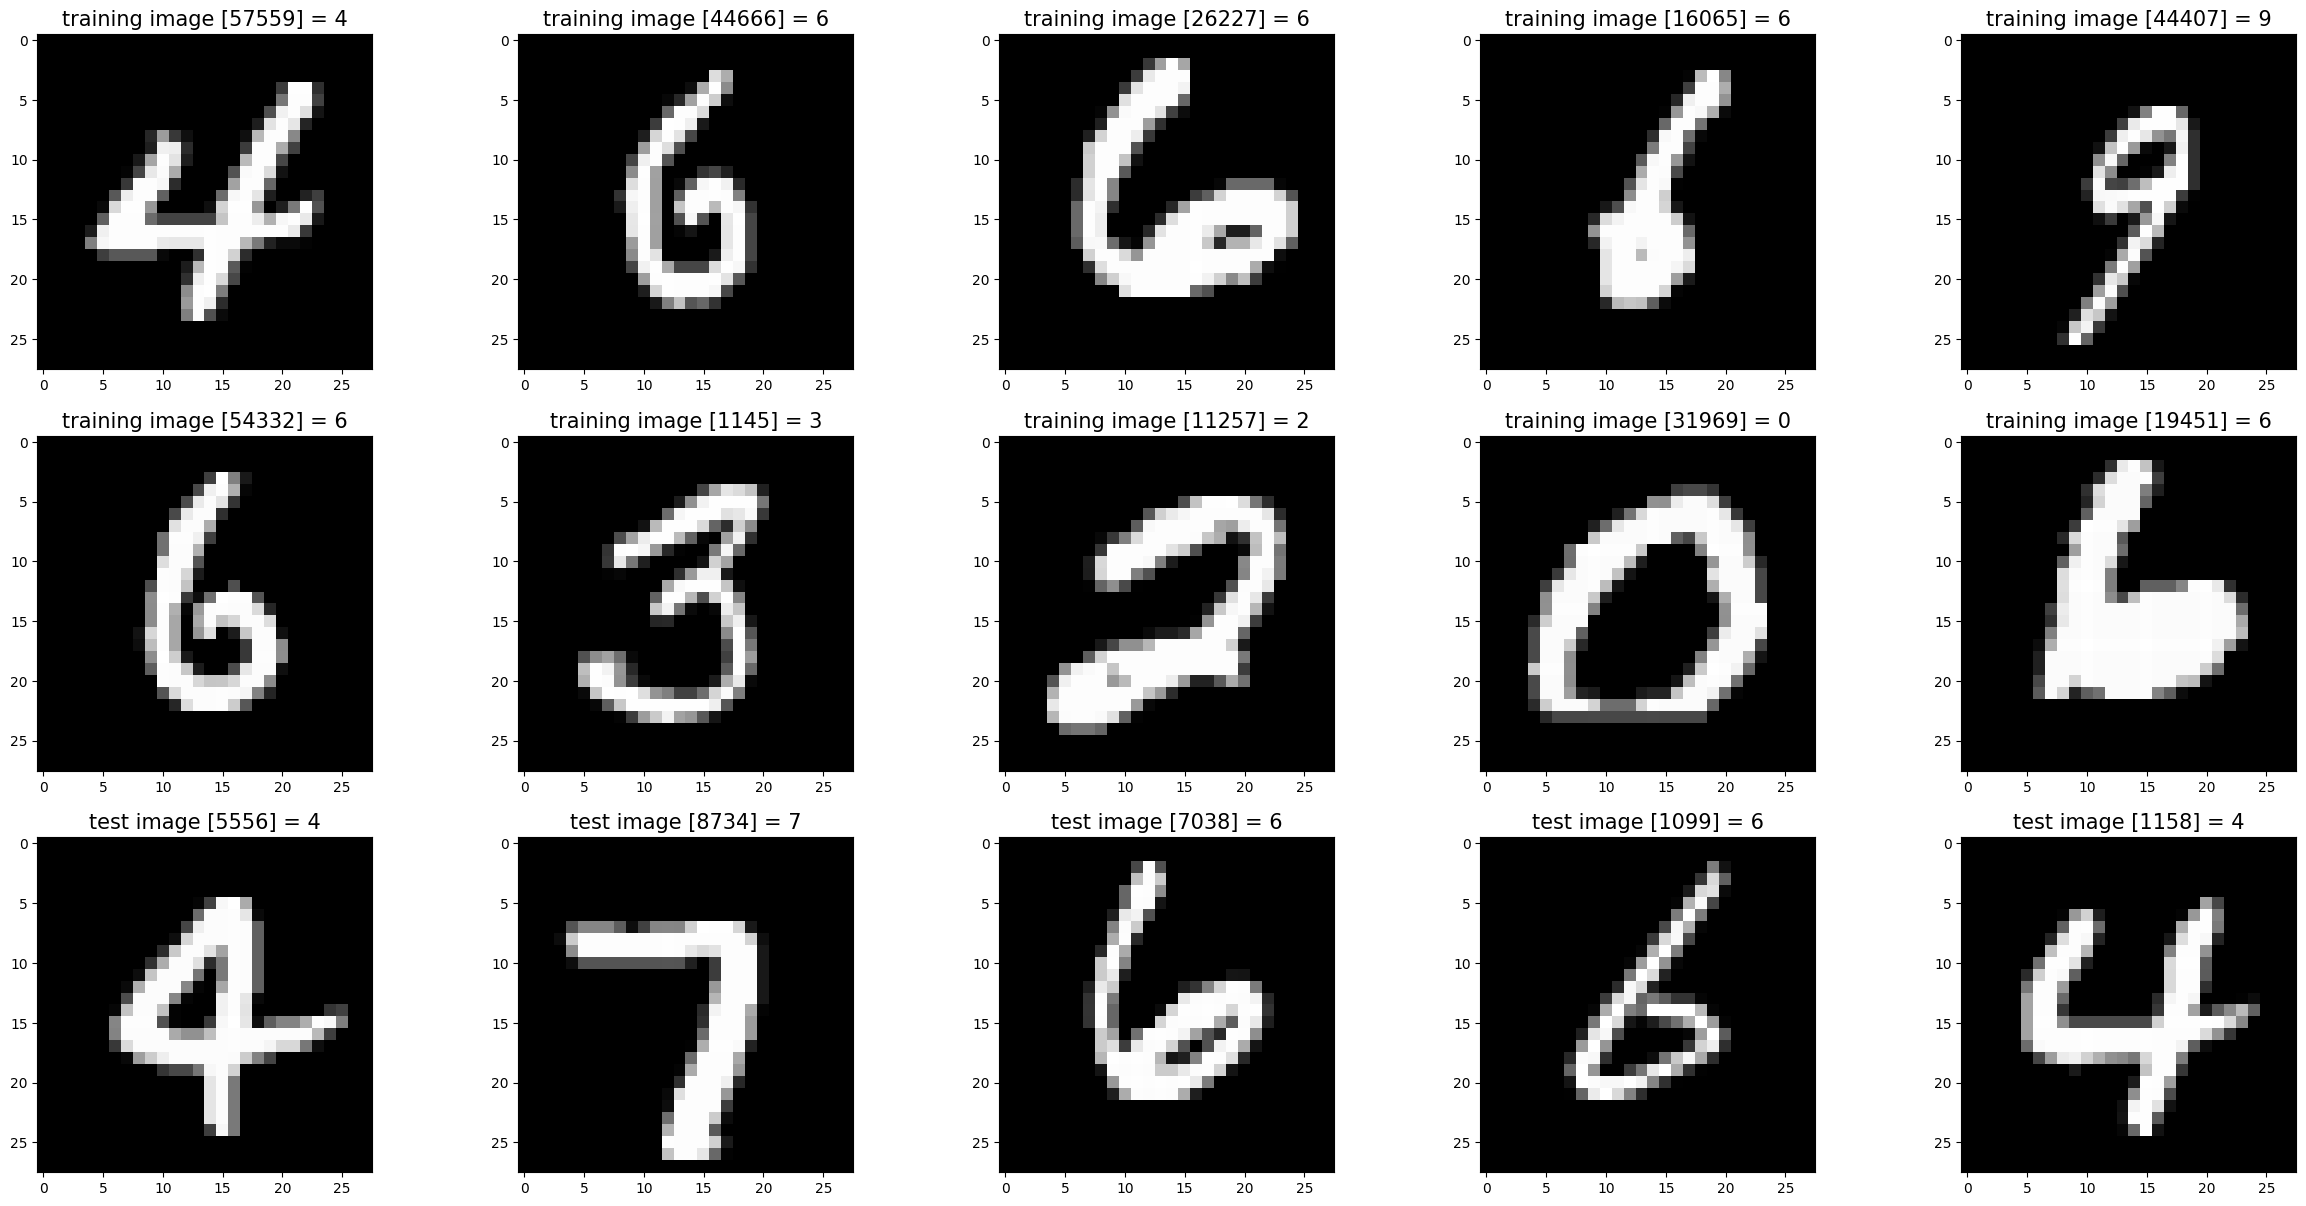

In [33]:
images_2_show = []
titles_2_show = []

for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)
#Hiển thị hình ảnh từ MNIST


Shapes of Datasets...

x_train size: (60000, 28, 28)
y_train size: (60000, 10)
x_test size: (10000, 28, 28)
y_test size: (10000, 10)

Visualising of Datasets...



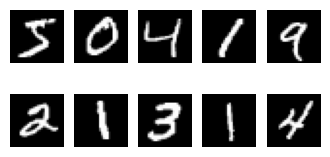

In [34]:
# Labelling Data,
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Dimensions of Data
print("\nShapes of Datasets...\n")
print(f"x_train size: {x_train.shape}\ny_train size: {y_train.shape}")
print(f"x_test size: {x_test.shape}\ny_test size: {y_test.shape}")


# Visualize the Data
print("\nVisualising of Datasets...\n")
figure, axis = plt.subplots(2, 5, figsize=(4,2))
axis = axis.ravel()
for i in range(10):
    axis[i].imshow(x_train[i].reshape(28,28), cmap="gray")
    axis[i].axis("off")
plt.show()

In [35]:
# Build the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(units=128, activation="relu"),
    Dropout(0.1),
    Dense(units=64, activation="relu"),
    Dropout(0.1),
    Dense(units=10, activation="softmax"),
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,410 (196.91 KB)

 Trainable params: 50,410 (196.91 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile the Model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [37]:
time_1 = time.time()
train = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)
time_2 = time.time()
print(f"Duration of training: {(time_2 - time_1) / 60:.2f} minute")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 63s 36ms/step - accuracy: 0.6126 - loss: 1.3556 - val_accuracy: 0.9688 - val_loss: 0.1078
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.9407 - loss: 0.2002 - val_accuracy: 0.9777 - val_loss: 0.0844
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.9568 - loss: 0.1502 - val_accuracy: 0.9798 - val_loss: 0.0686
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.9598 - loss: 0.1349 - val_accuracy: 0.9808 - val_loss: 0.0715
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9661 - loss: 0.1158 - val_accuracy: 0.9838 - val_loss: 0.0612
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.9708 - loss: 0.1042 - val_accuracy: 0.9857 - val_loss: 0.0553
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9724 - loss: 0.0986 - val_accuracy: 0.9832 - val_loss: 0.0642
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9740 -

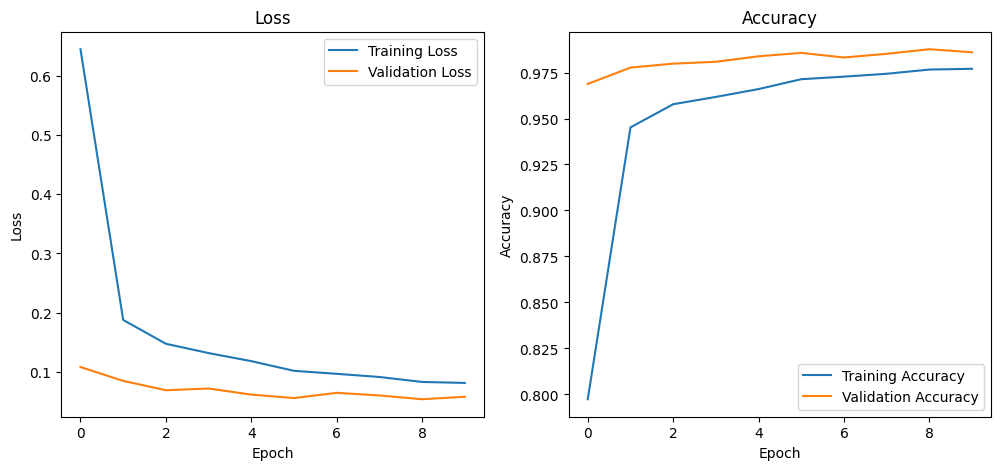

In [38]:
# Graphing the education process
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)    # 1 => row, 2 => column, 1 => index
plt.plot(train.history['loss'], label='Training Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train.history['accuracy'], label='Training Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [39]:
# Testing the Model
loss, acc = model.evaluate(x_test, y_test)
print(f"accuracy rate: {acc:.4f}\nloss rate: {loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9798 - loss: 0.0849
accuracy rate: 0.9830
loss rate: 0.0697


In [40]:
# Make predictios and Visualize the test data
def test_predictions(idx, x_test, y_test):
    model_predictions = np.argmax(model.predict(np.expand_dims(x_test[idx], axis=0)))
    true_labels = np.argmax(y_test[idx])
    return (model_predictions, true_labels)

def calculate_acc_and_loss(idx, prediction, label):
    n_false, n_correct = 0, 0
    if prediction != label:
        n_false += 1
    else:
        n_correct += 1
    return (n_correct, n_false)

def acc_and_loss_rate(n_cor, n_fal):
    correct_rate = n_correct / (n_correct + n_false)
    false_rate = n_false / (n_correct + n_false)
    return (correct_rate, false_rate)

n_correct, n_false = 0, 0
num_samples = 50
plt.figure(figsize=(15,35))

<Figure size 1500x3500 with 0 Axes>

<Figure size 1500x3500 with 0 Axes>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━

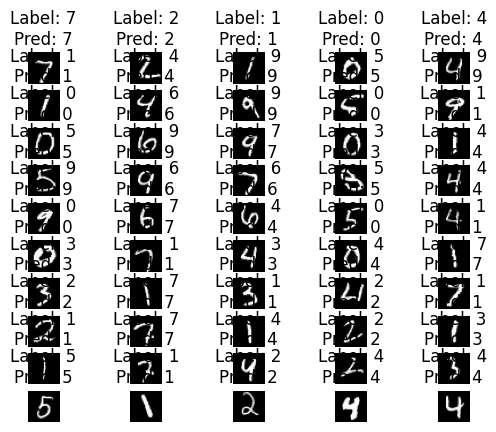


num false: 0 | num correct: 50
Accuracy rate for 50 images is: 1.0
Loss rate for 50 images is: 0.0


In [41]:
for i in range(num_samples):
    output, label = test_predictions(i, x_test, y_test)
    correct, false = calculate_acc_and_loss(i, output, label)
    n_correct += correct
    n_false += false
    plt.subplot(10, 5, i +1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {label}\nPred: {output}")
    plt.axis("off")
plt.show()

print(f"\nnum false: {n_false} | num correct: {n_correct}")
correct_rate, false_rate = acc_and_loss_rate(n_correct, n_false)
print(f"Accuracy rate for {num_samples} images is: {correct_rate}")
print(f"Loss rate for {num_samples} images is: {false_rate}")

In [44]:
# save model
model.save('/content/drive/My Drive/Data/my_model.keras')


In [46]:
!ls /content/drive/My Drive/Data




ls: cannot access '/content/drive/My': No such file or directory
ls: cannot access 'Drive/Data': No such file or directory


In [47]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [48]:
!git remote add origin https://github.com/LeNghiaDung/BTLPython.git

In [51]:
!git branch -M main

In [52]:
!git status


On branch main

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	drive/
	model.h5
	my_model.keras
	sample_data/


It took 2.56 seconds to enumerate untracked files. 'status -uno'
may speed it up, but you have to be careful not to forget to add
new files yourself (see 'git help status').
nothing added to commit but untracked files present (use "git add" to track)


In [54]:
!git add .config/

In [55]:
!git add my_model.keras

In [56]:
!git add /content/drive/My Drive/Data/BT

fatal: pathspec '/content/drive/My' did not match any files
